In [38]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
# from carps.analysis.process_data import get_interpolated_performance_df, load_logs, process_logs
import importlib
import carps
importlib.reload(carps)
importlib.reload(carps.analysis.gather_data)
from carps.analysis.gather_data import normalize_logs, get_interpolated_performance_df, load_logs, process_logs


def print_overview(df_trials: pd.DataFrame) -> None:
    print(df_trials.columns)
    print(df_trials["optimizer_id"].unique())
    print(df_trials["benchmark_id"].unique())
    print(df_trials["problem_id"].unique())
    print(df_trials["scenario"].unique())
    print("Number of seeds", df_trials["seed"].nunique())


# rundir = "../runs"
# df, df_cfg = load_logs(rundir=rundir)
# df = pd.read_csv("../logs_combined.csv")
# df_cfg = pd.read_csv("../logs_combined_cfg.csv")

paths = {
    "BBfull": {
        "full": [
        "../runs/SMAC3-BlackBoxFacade",
        "../runs/RandomSearch",
        "../runs/Nevergrad-CMA-ES",
    ]},
    "MOfull": {
        "full": ["../runs_MO"]
    },
    "BBsubset": {
        "dev": ["../runs_subset_BB/dev"],
        "test": ["../runs_subset_BB/test"],
    }
}
subset = "MOfull"
problem_prefix = "blackbox/30"


def load_set(paths: list[str], set_id: str = "unknown") -> tuple[pd.DataFrame, pd.DataFrame]:
    logs = []
    for p in paths:
        fn = Path(p) / "trajectory.parquet"
        if not fn.is_file():
            fn = Path(p) / "logs.parquet"
        logs.append(pd.read_parquet(fn))

    df = pd.concat(logs).reset_index(drop=True)
    df_cfg = pd.concat([pd.read_parquet(Path(p) / "logs_cfg.parquet") for p in paths]).reset_index(drop=True)
    df["set"] = set_id
    return df, df_cfg

loaded = [load_set(paths=ps, set_id=set_id) for set_id, ps in paths[subset].items()]
df = pd.concat([d for d, _ in loaded]).reset_index(drop=True)
df_cfg = pd.concat([d for _, d in loaded]).reset_index(drop=True)


print(df.columns)
print_overview(df)
df = normalize_logs(df)
print_overview(df)
perf = get_interpolated_performance_df(df)
perf_time = get_interpolated_performance_df(df, x_column="time_norm")


Index(['n_trials', 'n_incumbents', 'trial_value__cost',
       'trial_value__cost_inc', 'scenario', 'benchmark_id', 'problem_id',
       'optimizer_id', 'seed', 'reference_point', 'hypervolume', 'set'],
      dtype='object')
Index(['n_trials', 'n_incumbents', 'trial_value__cost',
       'trial_value__cost_inc', 'scenario', 'benchmark_id', 'problem_id',
       'optimizer_id', 'seed', 'reference_point', 'hypervolume', 'set'],
      dtype='object')
['SMAC3-MO' 'SyneTune-BO-MO-LS' 'SyneTune-BO-MO-RS' 'Optuna-MO']
['HPOBench' 'Pymoo' 'YAHPO']
['hpobench/MO/tab/ml/lr/10101' 'hpobench/MO/tab/ml/lr/12'
 'hpobench/MO/tab/ml/lr/146212' 'hpobench/MO/tab/ml/lr/146606'
 'hpobench/MO/tab/ml/lr/146818' 'hpobench/MO/tab/ml/lr/146821'
 'hpobench/MO/tab/ml/lr/146822' 'hpobench/MO/tab/ml/lr/14965'
 'hpobench/MO/tab/ml/lr/167119' 'hpobench/MO/tab/ml/lr/167120'
 'hpobench/MO/tab/ml/lr/168911' 'hpobench/MO/tab/ml/lr/168912'
 'hpobench/MO/tab/ml/lr/3' 'hpobench/MO/tab/ml/lr/31'
 'hpobench/MO/tab/ml/lr/3917' 

[11:22:04] INFO     Start normalization...                                                       ]8;id=863646;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=898436;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#317\317]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=188722;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=143518;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#318\318]8;;\

           INFO     Normalize cost...                                                            ]8;id=760018;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=854248;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#320\320]8;;\

           INFO     Calc normalized incumbent cost...                                            ]8;id=974508;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=212306;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#329\329]8;;\

           INFO     Normalize time...                                                            ]8;id=645371;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=20588;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#333\333]8;;\

           INFO     Done.                                                                        ]8;id=148943;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=61600;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#336\336]8;;\

Index(['n_trials', 'n_incumbents', 'trial_value__cost',
       'trial_value__cost_inc', 'scenario', 'benchmark_id', 'problem_id',
       'optimizer_id', 'seed', 'reference_point', 'hypervolume', 'set',
       'n_trials_norm', 'trial_value__cost_norm', 'trial_value__cost_inc_norm',
       'time', 'time_norm'],
      dtype='object')
['SMAC3-MO' 'SyneTune-BO-MO-LS' 'SyneTune-BO-MO-RS' 'Optuna-MO']
['HPOBench' 'Pymoo' 'YAHPO']
['hpobench/MO/tab/ml/lr/10101' 'hpobench/MO/tab/ml/lr/12'
 'hpobench/MO/tab/ml/lr/146212' 'hpobench/MO/tab/ml/lr/146606'
 'hpobench/MO/tab/ml/lr/146818' 'hpobench/MO/tab/ml/lr/146821'
 'hpobench/MO/tab/ml/lr/146822' 'hpobench/MO/tab/ml/lr/14965'
 'hpobench/MO/tab/ml/lr/167119' 'hpobench/MO/tab/ml/lr/167120'
 'hpobench/MO/tab/ml/lr/168911' 'hpobench/MO/tab/ml/lr/168912'
 'hpobench/MO/tab/ml/lr/3' 'hpobench/MO/tab/ml/lr/31'
 'hpobench/MO/tab/ml/lr/3917' 'hpobench/MO/tab/ml/lr/53'
 'hpobench/MO/tab/ml/lr/7592' 'hpobench/MO/tab/ml/lr/9952'
 'hpobench/MO/tab/ml/lr/9977' '

           INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=27187;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=672706;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#375\375]8;;\
                    budget.                                                                                        

[11:22:07] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=585758;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=492671;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#375\375]8;;\
                    budget.                                                                                        

In [29]:
list(df.groupby(by=["scenario", "set", "benchmark_id", "problem_id", "seed"]))[0]

(('multi-objective', 'full', 'HPOBench', 'hpobench/MO/tab/ml/lr/10101', 1),
      n_trials  n_incumbents  trial_value__cost  trial_value__cost_inc  \
 0           0             1          -0.055524              -0.055524   
 1           1             2          -0.077852              -0.077852   
 2           2             3          -0.080003              -0.080003   
 3           3             3          -0.085337              -0.085337   
 4           4             4          -0.085706              -0.085706   
 ..        ...           ...                ...                    ...   
 929        57            11          -0.087740              -0.099132   
 930        61            12          -0.088076              -0.099132   
 931        63            11          -0.088132              -0.099132   
 932        65            12          -0.088171              -0.099132   
 933        69            13          -0.094774              -0.099132   
 
             scenario benchmark_id

In [30]:
# from carps.analysis.utils import filter_only_final_performance, setup_seaborn, savefig
# from carps.analysis.gather_data import normalize_logs, get_interpolated_performance_df
# import seaborn as sns
# import pandas as pd
# import matplotlib.pyplot as plt
# from carps.analysis.gather_data import normalize

# setup_seaborn(font_scale=2)


# df_mo = pd.read_csv("../trajectory.csv")
# df_mo["n_trials_norm"] = df_mo.groupby("problem_id")["n_trials"].transform(normalize)
# df_mo["hypervolume_norm"] = df_mo.groupby("problem_id")["hypervolume"].transform(normalize)
# df_mo["trial_value__cost"] = 0
# df_mo["trial_value__cost_inc"] = df_mo["hypervolume"]
# df_mo["trial_value__cost_inc_norm"] = df_mo["hypervolume_norm"]
# perf_mo = get_interpolated_performance_df(df_mo, interpolation_columns=["hypervolume", "hypervolume_norm"])
# df_mo_final = filter_only_final_performance(df_mo)
# problem_prefix = ""

# for indicator in ["hypervolume_norm"]:
#     fig, ax = plt.subplots()
#     ax = sns.boxplot(data=df_mo_final, x="optimizer_id", y=indicator, ax=ax)
#     ax.tick_params(axis="x", labelsize=10)
#     savefig(fig, f"figures/mo/mo_{indicator}_boxplot")
#     plt.show()

#     fig, ax = plt.subplots()
#     ax = sns.violinplot(data=df_mo_final, x="optimizer_id", y=indicator, cut=0., ax=ax)
#     ax.tick_params(axis="x", labelsize=10)
#     savefig(fig, f"figures/mo/mo_{indicator}_violinplot")
#     plt.show()

#     fig, ax = plt.subplots()
#     ax = sns.lineplot(data=perf_mo, x="n_trials_norm", y=indicator, hue="optimizer_id", linewidth=4, ax=ax)
#     ax.legend(fontsize=16)
#     savefig(fig, f"figures/mo/mo_{indicator}_over_time")
#     plt.show()


----------------------------------------------------------------------------------------------------
('multi-objective', 'full')


[11:12:15] INFO     Lost following experiments: optimizer_id                    Optuna-MO       ]8;id=191777;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=943121;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#108\108]8;;\
                    SMAC3-MO  SyneTune-BO-MO-LS  \                                                                 
                    problem_id                                                                                     
                    hpobench/MO/tab/ml/lr/10101           NaN  0.075076           0.129139                         
                    hpobench/MO/tab/ml/lr/12              NaN  0.038053           0.092484                         
                    hpobench/MO/tab/ml/lr/146212          NaN  0.090414           0.060992                         
                    hpobench/MO/tab/ml/lr/146606          NaN  0.066722           0.435413                         
                    hpobench/MO/tab/ml/lr/146818          NaN  0.066110           0.056927                         
                    ...                                   ...       ...                ...                         
                    yahpo/mo/rbv2_super/1457/None         NaN  0.009790                NaN                         
                    yahpo/mo/rbv2_super/6/None            NaN  0.027698                NaN                         
                    yahpo/mo/rbv2_xgboost/12/None         NaN  0.009984                NaN                         
                    yahpo/mo/rbv2_xgboost/182/None        NaN  0.003169                NaN                         
                    yahpo/mo/rbv2_xgboost/28/None         NaN  0.002035                NaN                         
                                                                                                                   
                    optimizer_id                    SyneTune-BO-MO-RS                                              
                    problem_id                                                                                     
                    hpobench/MO/tab/ml/lr/10101              0.152521                                              
                    hpobench/MO/tab/ml/lr/12                 0.111722                                              
                    hpobench/MO/tab/ml/lr/146212             0.060126                                              
                    hpobench/MO/tab/ml/lr/146606             0.471188                                              
                    hpobench/MO/tab/ml/lr/146818             0.078898                                              
                    ...                                           ...                                              
                    yahpo/mo/rbv2_super/1457/None                 NaN                                              
                    yahpo/mo/rbv2_super/6/None                    NaN                                              
                    yahpo/mo/rbv2_xgboost/12/None                 NaN                                              
                    yahpo/mo/rbv2_xgboost/182/None                NaN                                              
                    yahpo/mo/rbv2_xgboost/28/None                 NaN                                              
                                                                                                                   
                    [103 rows x 4 columns]                                                                         

Rejecting null hypothesis that data is normal for column Optuna-MO (p=0.002756<0.012500)
Rejecting null hypothesis that data is normal for column SMAC3-MO (p=0.006330<0.012500)
Fail to reject null hypothesis that data is normal for column SyneTune-BO-MO-LS (p=0.020914>=0.012500)
Fail to reject null hypothesis that data is normal for column SyneTune-BO-MO-RS (p=0.051714>=0.012500)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.006324)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance.
                   meanrank    median       mad  ci_lower  ci_upper  \
SyneTune-BO-MO-LS  1.722222  0.097692  0.077421  0.016401  0.367394   
Optuna-MO          2.444444  0.146759  0.100237  0.039086  0.677422   
SMAC3-MO           2.611111  0.125842  0.086359  0.021727  0.524278   
SyneTune-BO-MO-RS  3.222222  0.132629  0.104322  0.036067  0.552438  

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:224: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot_line([(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)], linewidth=0.7)
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:229: FutureWarning: Serie

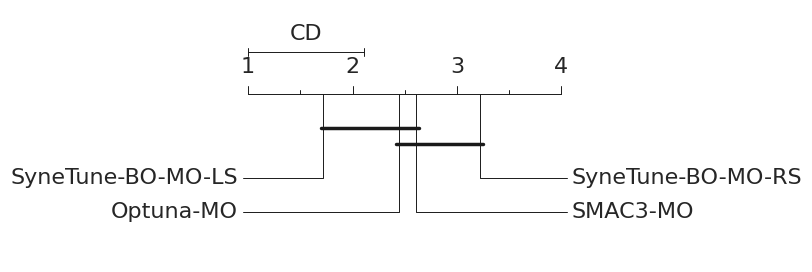

The statistical analysis was conducted for 4 populations with 18 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations SyneTune-BO-MO-LS (p=0.003) and Optuna-MO (p=0.006). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than the critical distance CD=1.106 of the Nemenyi test.
We reject the null hypothesis (p=0.006) of the Friedman 

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:


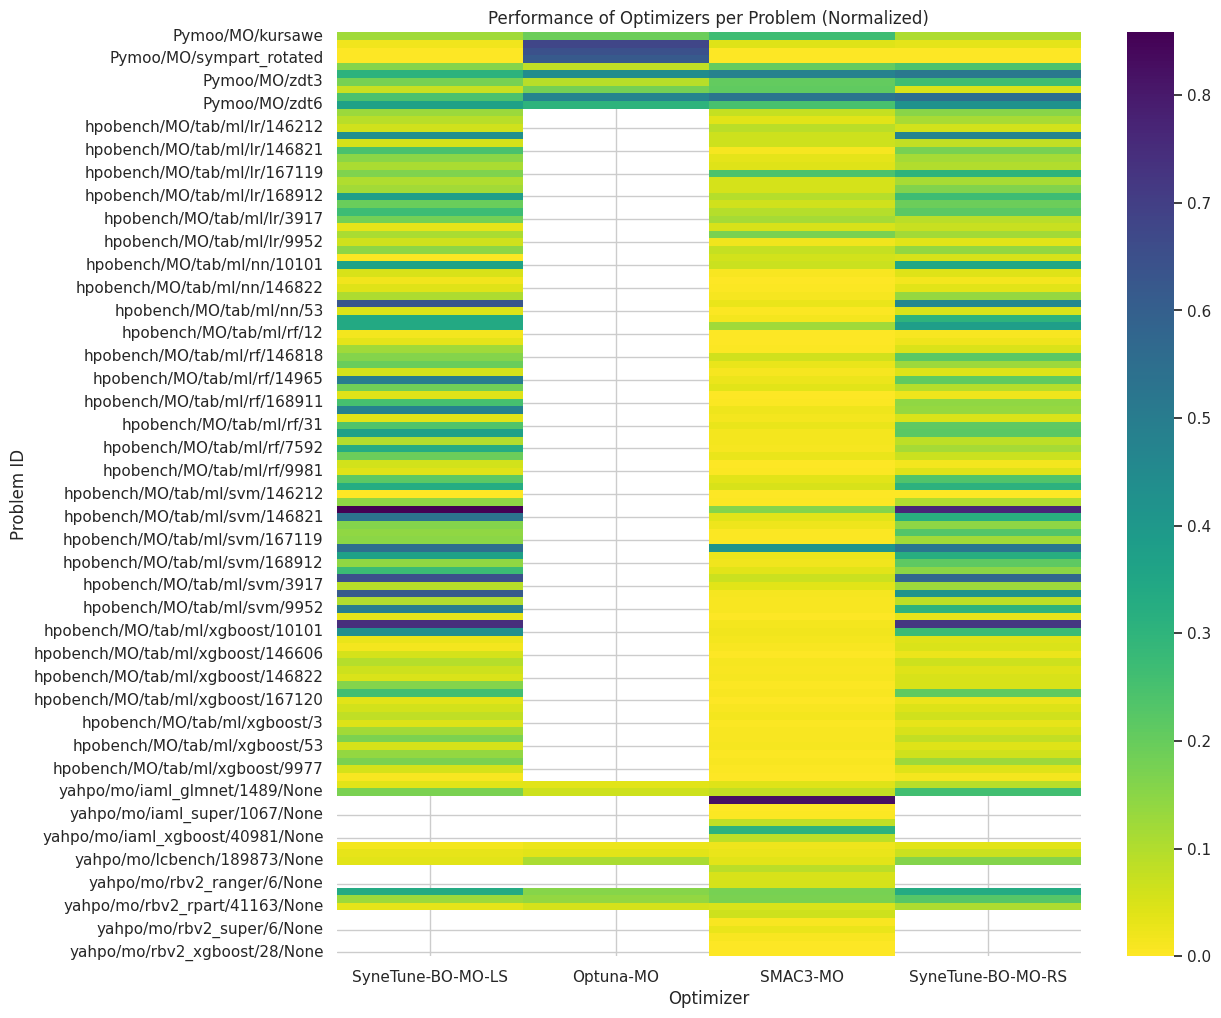

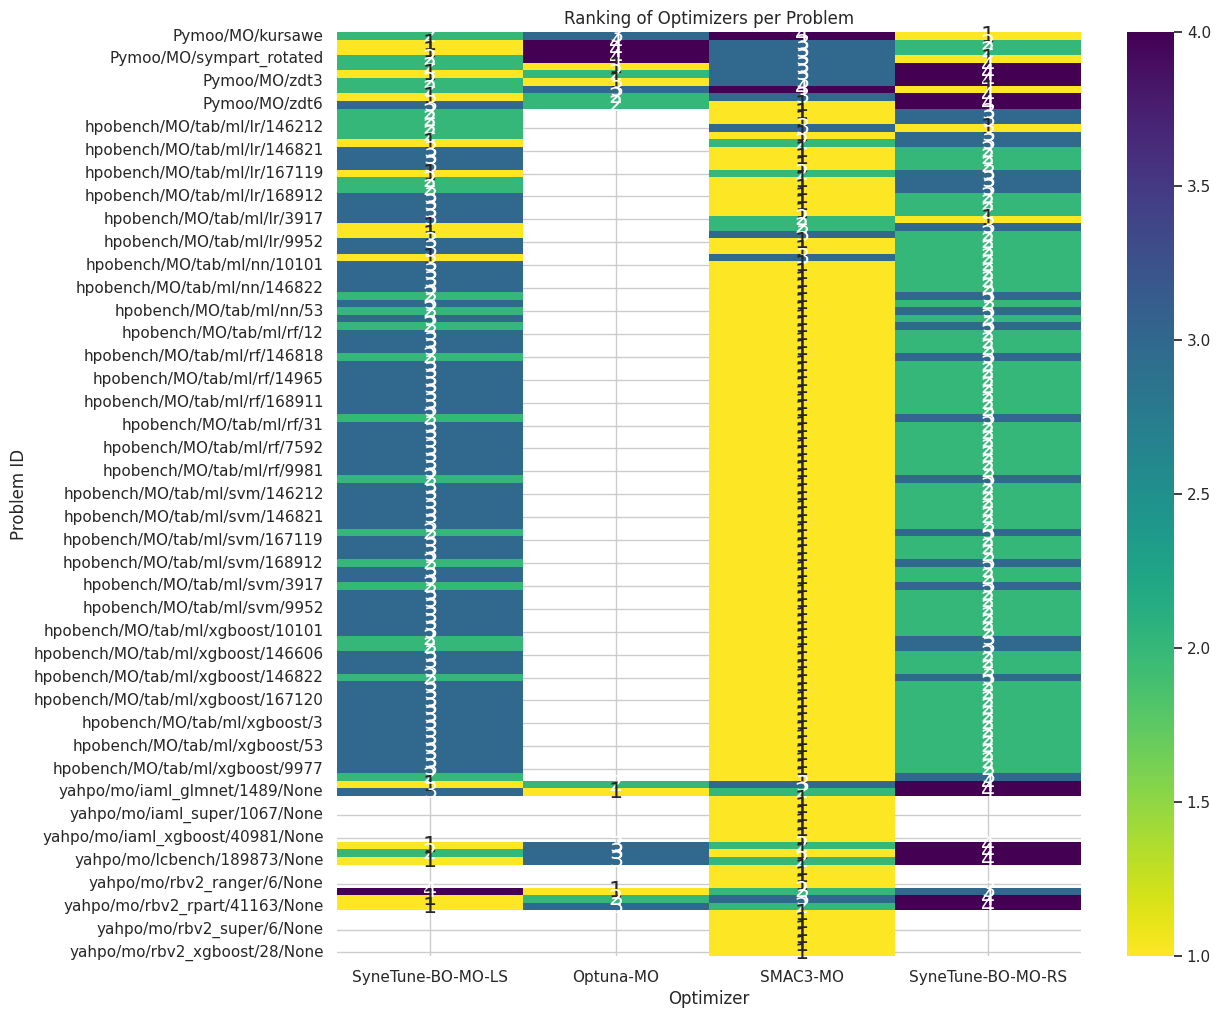

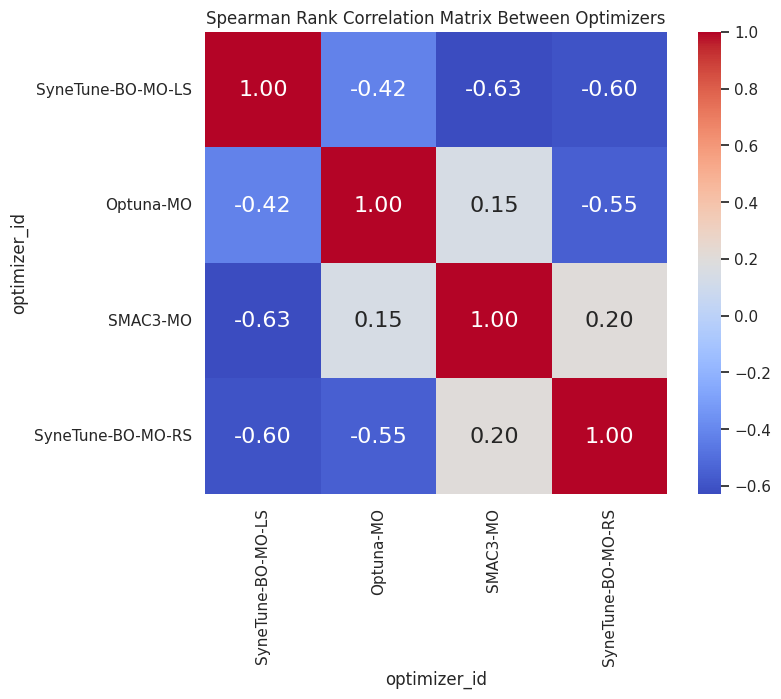

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from carps.analysis.utils import setup_seaborn
import seaborn as sns
from carps.analysis.plot_ranking import plot_ranking

setup_seaborn(font_scale=1)

for gid, gdf in df.groupby(by=["scenario", "set"]):    
    print("-"*100)
    print(gid)
    scenario, set_id = gid
    perf_col = "trial_value__cost_inc_norm"
    if len(gdf) > 0:
        plot_ranking(gdf=gdf, scenario=scenario, set_id=set_id, perf_col=perf_col)


In [32]:

# fig, axes = plot_interval_estimates(performance_data=perf, load_from_pickle=False, figure_filename="figures/plot_interval_estimates.pdf")

('multi-objective', 'full')


('multi-objective', 'full')


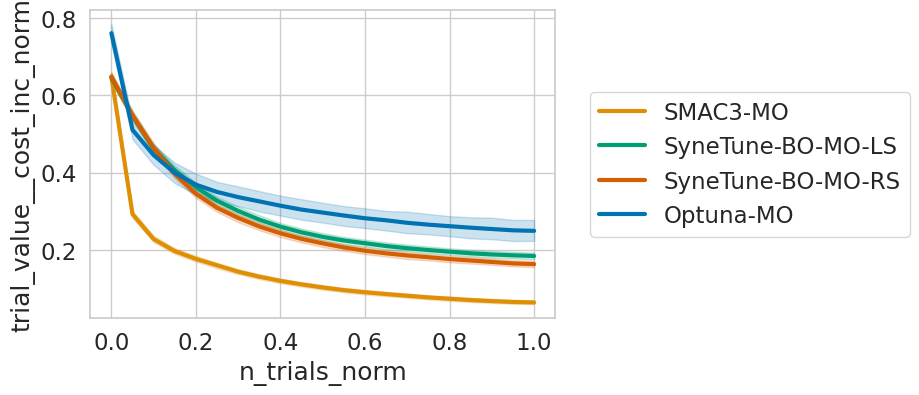

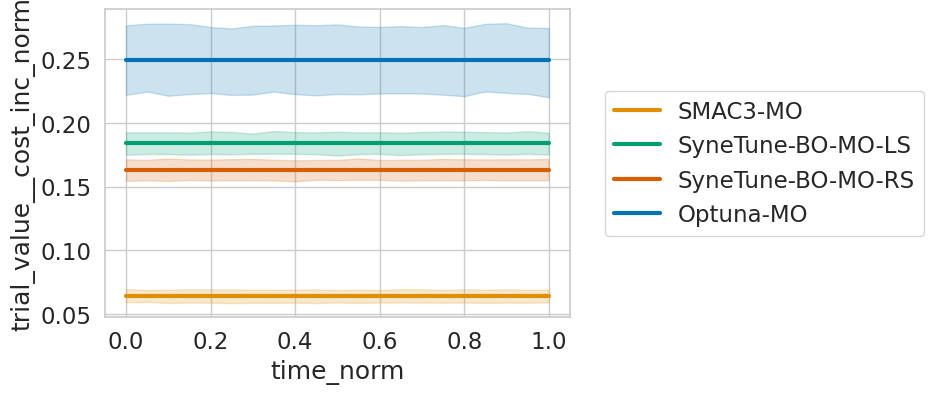

In [33]:
from carps.analysis.performance_over_time import plot_performance_over_time, setup_seaborn, savefig, get_color_palette
import seaborn as sns
import matplotlib
lineplot_kwargs = dict(linewidth=3)
for gid, gdf in perf.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf, 
        x="n_trials_norm", 
        y="trial_value__cost_inc_norm", 
        hue="optimizer_id", 
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_trials.pdf", 
        figsize=(6,4), 
        **lineplot_kwargs
    )
for gid, gdf in perf_time.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf, 
        x="time_norm", 
        y="trial_value__cost_inc_norm", 
        hue="optimizer_id", 
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_elapsed.pdf", 
        figsize=(6,4), 
        **lineplot_kwargs
    )

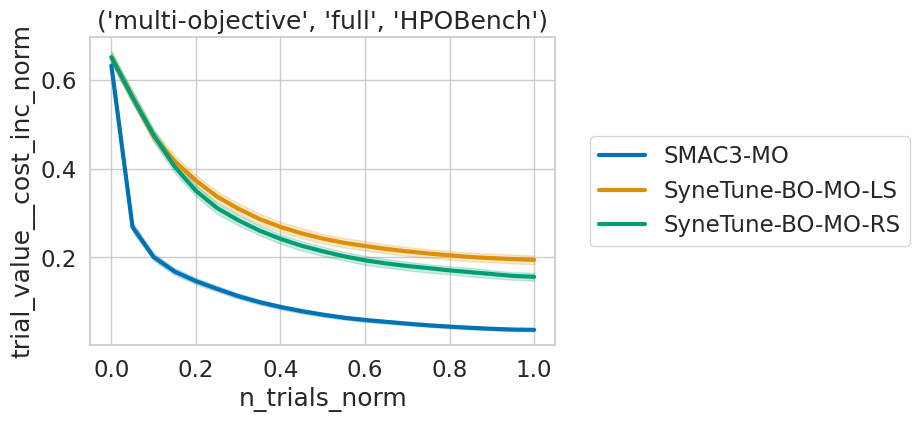

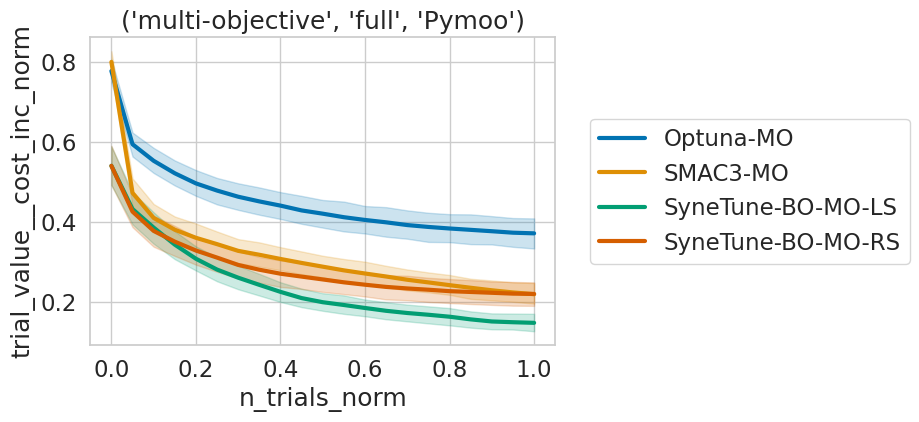

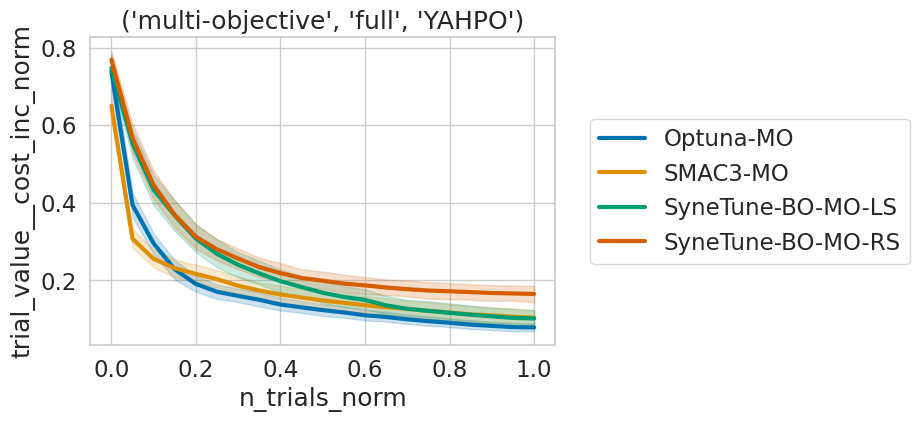

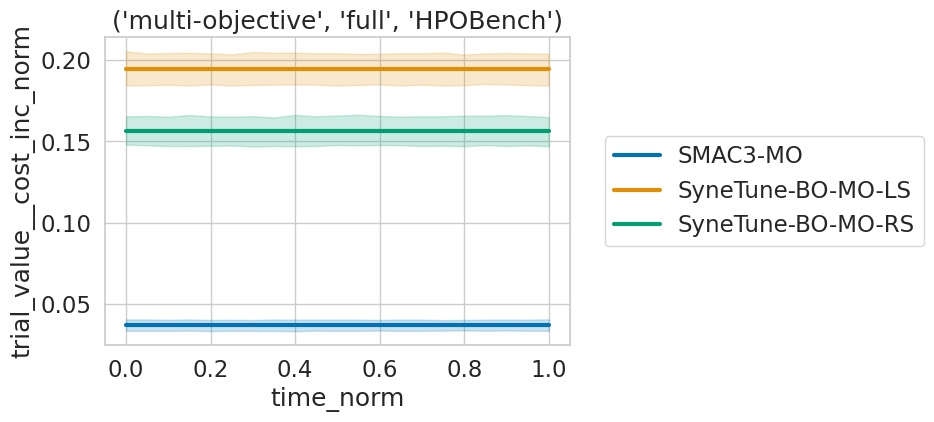

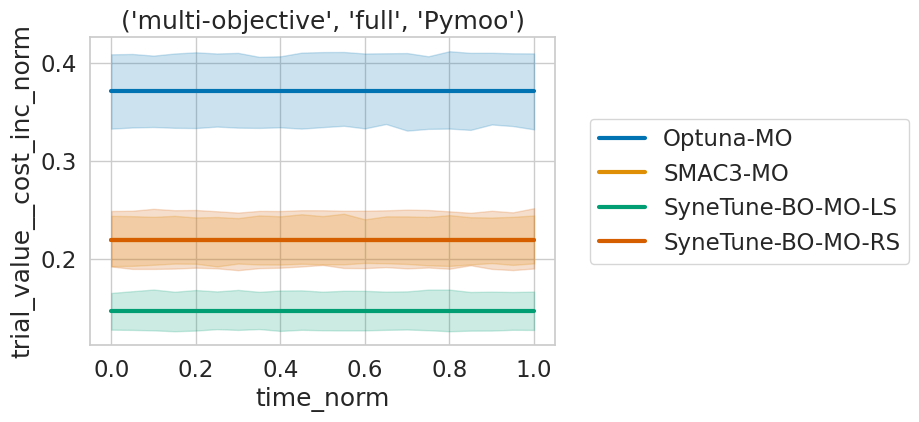

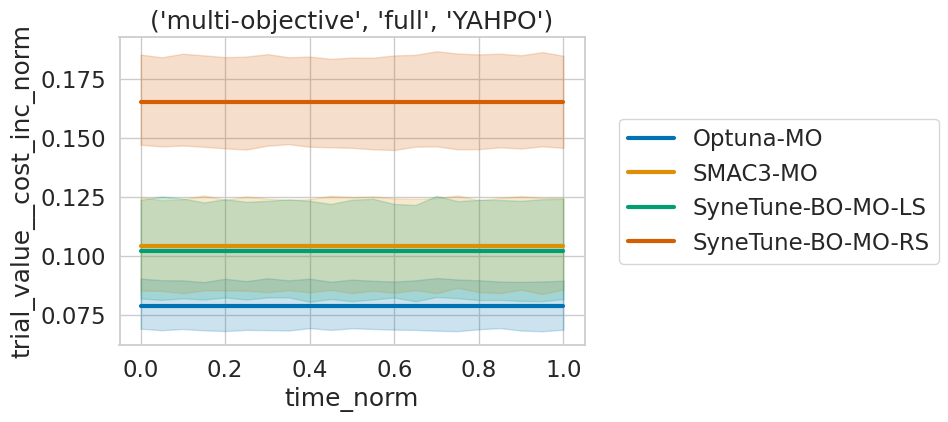

In [34]:
# Plot per benchmark
from carps.analysis.utils import get_color_palette, savefig
from carps.analysis.performance_over_time import plot_performance_over_time

palette = get_color_palette(perf)
lineplot_kwargs = dict(linewidth=3)

for gid, gdf in perf.groupby(by=["scenario", "set", "benchmark_id"]):
    # Iterations
    figure_filename = f"figures/perf_over_time/performance_over_time_trials_{gid}.pdf"
    fig, ax = plot_performance_over_time(df=gdf, x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

# Elapsed time
for gid, gdf in perf_time.groupby(by=["scenario", "set", "benchmark_id"]):    
    figure_filename = f"figures/perf_over_time/performance_over_time_elapsed_{gid}.pdf"
    fig, ax = plot_performance_over_time(df=gdf, x="time_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

('multi-objective', 'full')


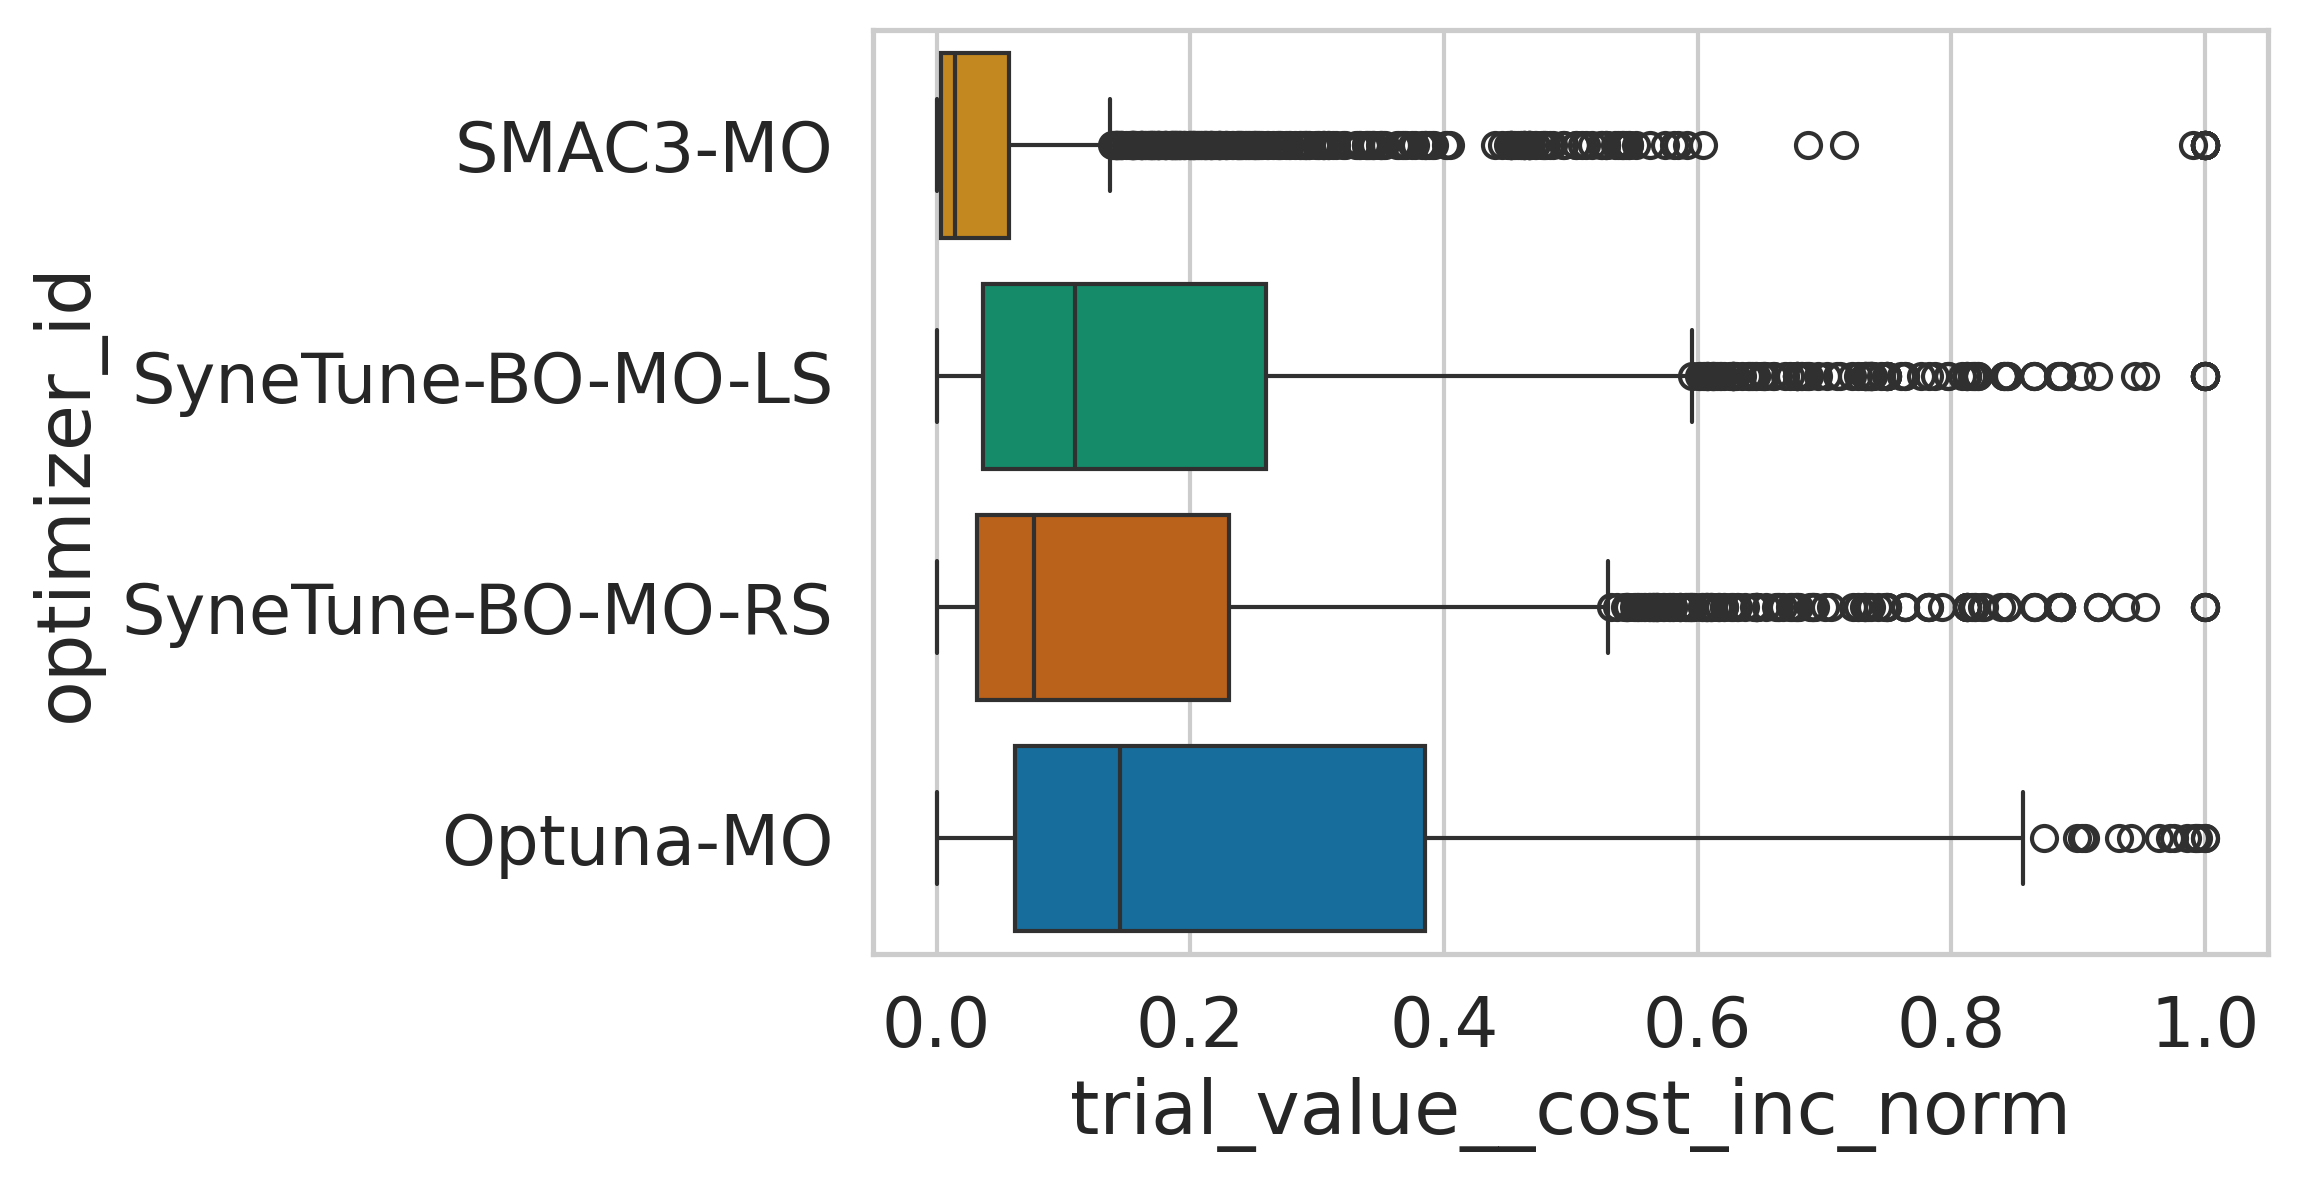

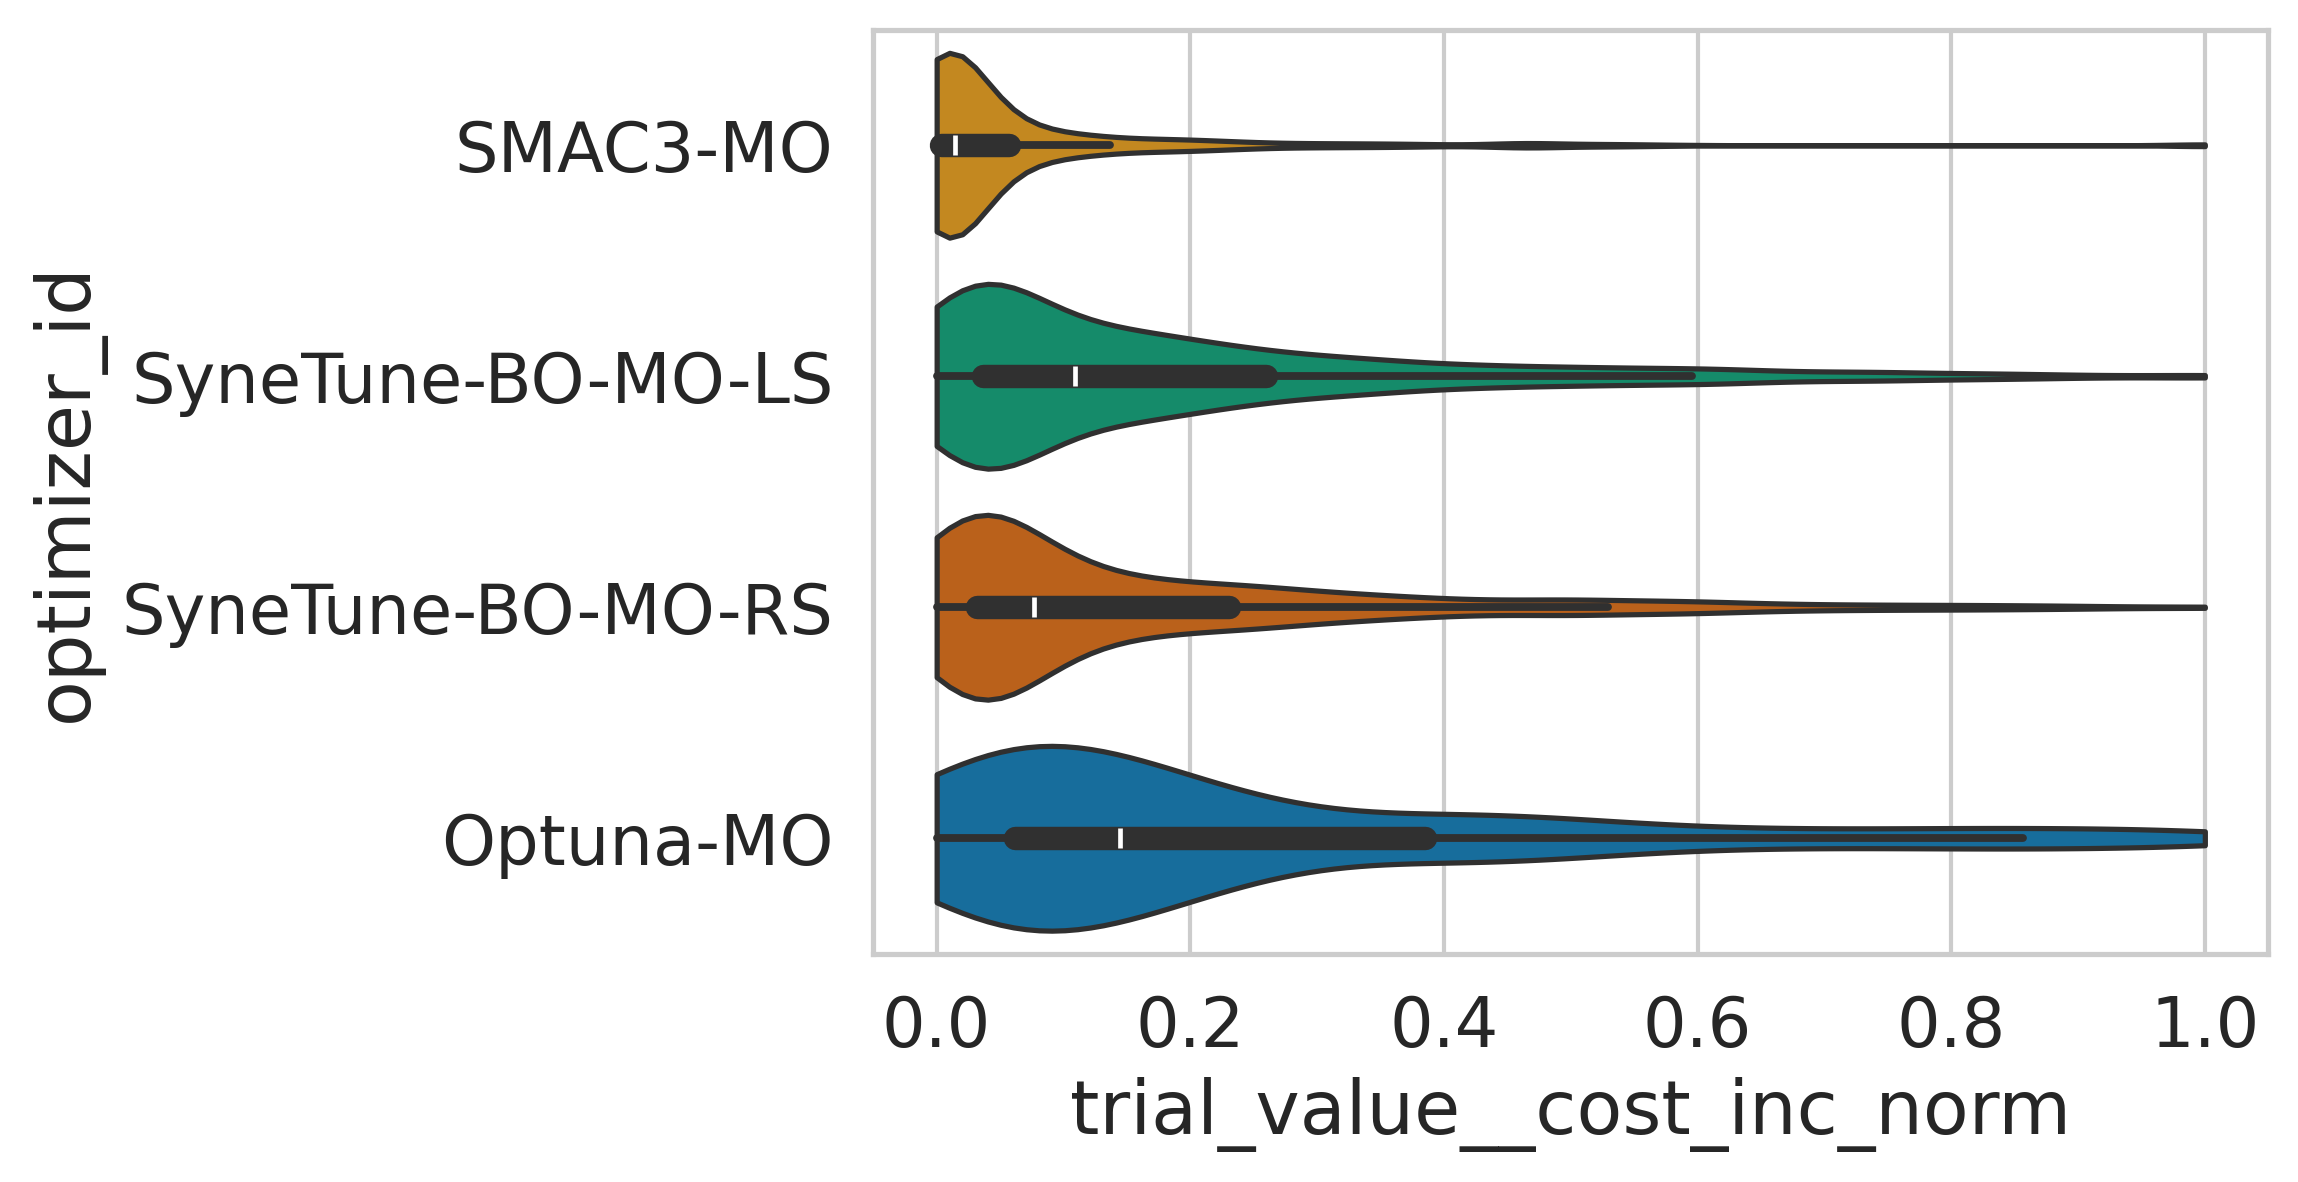

In [35]:
from carps.analysis.final_performance import plot_final_performance_boxplot, plot_final_performance_violinplot
from carps.analysis.utils import filter_only_final_performance

boxplot_kwargs = dict()

for gid, gdf in perf.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_final_performance_boxplot(
        df=gdf, 
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_boxplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)
    fig, ax = plot_final_performance_violinplot(
        df=gdf, 
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_violinplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)

In [36]:
max_val = df["n_trials_norm"].max()
error = df.groupby(by=["benchmark_id", "problem_id", "optimizer_id", "seed"])["n_trials_norm"].apply(lambda x: not np.isclose(x.max(), max_val))
error = error[error]
for i in error.index:
    print(i)

('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 1)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 2)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 3)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 4)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 5)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 6)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 7)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 8)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 9)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 10)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 11)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 12)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 13)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 14)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 15)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC3-MO', 16)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'SMAC